In [1]:
import numpy as np
X = np.arange(-10,10,0.2)
Y = (2*np.cos(X)/-np.pi) + ((2*X)/(2*np.pi)) + (2*np.cos(3*X)/(-3*np.pi))

In [2]:
def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

In [3]:
def poly(coeff,x):
    vals = np.zeros((X.shape[0]))
    s = coeff.shape[0]
    c = coeff[::-1]
    for j in range(x.shape[0]):
        for i in range(s):
            vals[j] += (x[j]**(i)) * c[i]
    return vals

In [4]:
def evaluate(x, y, coeffs):
    mse = list()
    for i in range(len(coeffs)):
        y_hat = poly(coeffs[i],x)
        mse.append(MSE(y, y_hat))
    return mse

In [5]:
white_noise = np.random.normal(0, 1, size=100)
noisy_Y_w = Y + (0.1 * white_noise)
poisson_noise = np.random.poisson(2, size=100)
noisy_Y_p = Y + (0.1 * poisson_noise)
coeff1 = list()
coeff2 = list()
for i in range(1,16):
    coeff1.append(np.polyfit(X,noisy_Y_w,deg=i))
    coeff2.append(np.polyfit(X,noisy_Y_p,deg=i))

In [6]:
wn_mse = evaluate(X, noisy_Y_w, coeff1)
pn_mse = evaluate(X, noisy_Y_p, coeff2)

[-4.0, 5.0]

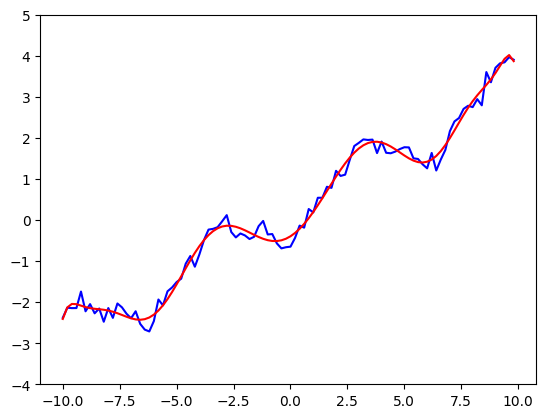

In [7]:
import matplotlib.pyplot as plt
#plt.plot(X, Y, color='r')
#plt.plot(X, noisy_Y_w, color='b')
plt.plot(X, noisy_Y_p, color='b')
plt.plot(X, poly(coeff2[14], X), color='r')
plt.setp(plt.gca(), ylim=(-4, 5))

In [8]:
def MBE(true, pred):
    return np.mean(true-pred)
 
def MVE(true, pred):
    return np.mean((true-pred)**2)

In [9]:
wn_mbe = list()
pn_mbe = list()
wn_mve = list()
pn_mve = list()
for i in range(15):
    wn_mbe.append(MBE(noisy_Y_w, poly(coeff1[i], X)))
    pn_mbe.append(MBE(noisy_Y_p, poly(coeff2[i], X)))
    wn_mve.append(MVE(noisy_Y_w, poly(coeff1[i], X)))
    pn_mve.append(MVE(noisy_Y_p, poly(coeff2[i], X)))

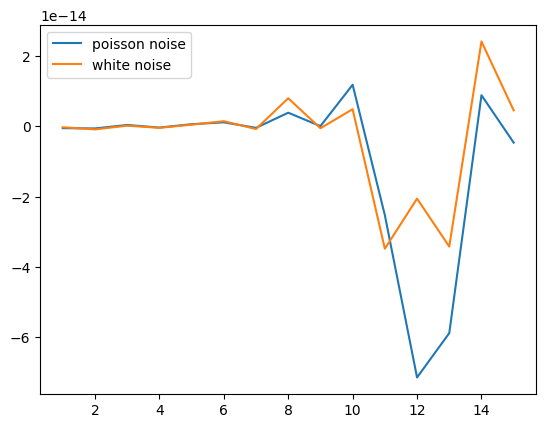

In [10]:
plt.plot(list(range(1,len(pn_mbe)+1)), pn_mbe, label="poisson noise")
plt.plot(list(range(1,len(wn_mbe)+1)), wn_mbe, label="white noise")
plt.legend()

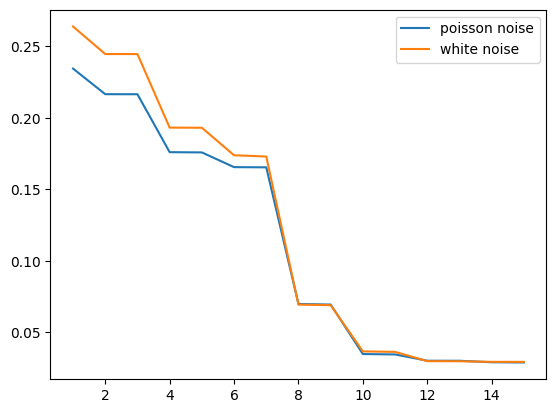

In [11]:
 plt.plot(list(range(1,len(pn_mve)+1)), pn_mve, label="poisson noise")
plt.plot(list(range(1,len(wn_mve)+1)), wn_mve, label="white noise")
plt.legend()